# <center> R1.13 introduction à Python <br> TP4 - Nim, Marienbad et IA </center>
<center> 2024/2025 - Thibault Godin </center>
<center> IUT de Vannes, BUT Informatique </center>

***

Dans ce TP, on va voir une méthode d'intelligence artificielle classique, **l'apprentissage par renforcement**


On va présenter cette notion à l'aide d'une activité proposée par des collègues de la (Maison des Mathématiques et de l'Informatique)[https://mmi-lyon.fr/] (MMI) et du réseau Informatique Débranchée sur le jeu de _Nim_, puis on essaiera de l'appliquer au jeu de Grundy vu en JAVA en R1.01



- https://mmi-lyon.fr/?site_ressource_peda=jeu-de-nim-et-ia-avec-python
- https://mmi-lyon.fr/?site_ressource_peda=jeu-de-nim-et-ia
- video 

In [13]:
import random
import time

import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

from IPython.display import HTML

# Jeu de Nim


## Mise en place


Le jeu de Nim se joue à 2 joueurs selon les règles suivantes : 
- On commence la partie avec un tas de $n$ allumettes
- Les deux joueurs jouent alternativement
- Seulement 1, 2, ou 3 allumette(s) peuvent être retirée(s) par un joueur à chaque tour
- La personne qui tire la dernière alumettre a gagné (version normale, on peut aussi dire "la personne qui ne peut plus jouer a perdu")

>**_question 1_** <br>
jouer (en silence) une ou deux parties avec un voisin

In [2]:
np.random.rand()< .5

False

>**_question 2_**<br> 
lire (en diagonale) à quoi ressemblent les (stratégies gagnantes)[https://interstices.info/jeux-de-nim/] de ce jeu 

>**_question 3_**<br> 
visualiser et comprendre l'apprentissage par renforcement proposé pour le jeu de Nim sur https://projet.liris.cnrs.fr/~mam/machine/




--------------------------



## Niammi : Nim Artificial Intelligence Maison des Mathématiques et de l'Informatique

Voici un programme Python (implémenté par Olivier Druet de la MMI) permettant de jouer au jeu de Nim contre un ordinateur _qui apprend au fur et à mieux jouer_. 

>**_question 4_**<br> 
lire et comprendre

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 21 10:32:50 2022

@author: druet
"""

import random
import time


################### le message de bienvenue et d'explication ##################

def welcome_message():
    print("""
----------------------------------------------------------------------------
                        Règles du jeu de Nim
----------------------------------------------------------------------------
Règles : 1 - L'utilisateur et l'ordinateur jouent à tour de rôle.
         2 - L'ordinateur commence.4. stockage de stratégie

         3 - Seulement 1 ou 2 bâtons peuvent être retirés à chaque coup.
         4 - Celui qui tire le dernier bâton a gagné.
         
----------------------------------------------------------------------------
                           Apprentissage
----------------------------------------------------------------------------                        
Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.
----------------------------------------------------------------------------
""")

#### Nous faisons commencer l'ordinateur parce que le premier joueur a une 
#### stratégie gagnante. Si le joueur commence et qu'il joue bien, la machine 
#### perdra quoiqu'elle fasse et n'apprendra rien. 

###############################################################################


################## définition et impression de la position de jeu #############

def printboard(n):
    board=[]
    for _ in range(n):
        board.append("/")
    print("\n----------------------------------------------------------------------------")
    print("      ",*board, sep="   ")
    print("----------------------------------------------------------------------------\n")
    print("Il reste " + str(n) + " allumettes.")
    
###############################################################################


################### initialisation de la machine ##############################

nombre_allumettes=8 ### vous pouvez changer le nombre d'allumettes de départ
board = [] ### le plateau de jeu
boulesjaunes = [] ### correspond au nombre de boules jaunes dans la case
boulesrouges = [] ### correspond au nombre de boules rouges dans la case
tirage = [] ### correspondra au tirage dans une partie
for _ in range(nombre_allumettes):
    boulesjaunes.append(2)
    boulesrouges.append(2)
    tirage.append(0)
#### Attention Python commence à 0 #####
boulesrouges[0]=0 #### il ne faut pas mettre de boules rouges dans la case 0, coup interdit


###############################################################################


#################### programme principal : jeu + renforcement #################
welcome_message()
uneautrepartie=True
compteur_partie=0
time.sleep(1)
print("La probabilité de gain de l'ordinateur à la première partie si le joueur joue optimalement est de 12,5 %")
time.sleep(1)
while uneautrepartie :
    player = "CMP"
    allumettes=nombre_allumettes
    tirage=[0,0,0,0,0,0,0,0]
    while allumettes>0:
        printboard(allumettes)  ### imprime la position de jeu
        time.sleep(1)
        if player=='CMP': ### c'est à l'ordinateur de jouer
            print("\nL'ordinateur choisit de retirer...")
            time.sleep(1)
            somme=boulesjaunes[allumettes-1]+boulesrouges[allumettes-1]
            boulehasard=random.randint(1,somme)##permet de tirer jaune ou rouge
            if boulehasard <= boulesjaunes[allumettes-1]: ##la machine a tiré jaune, i.e. elle enlève une allumette
                tirage[allumettes-1]=1
                allumettes=allumettes-1
                print("1 allumette.")
            else:
                tirage[allumettes-1]=2
                allumettes=allumettes-2
                print("2 allumettes.")
            if allumettes==0:
                winner='CMP'
            else:
                player='USER'  
        else: ### c'est au joueur de jouer
#### on demande au joueur ce qu'il souhaite jouer avec vérification que c'est un coup légal
            coup_joueur=0
            print("\n--À vous de jouer !--")
            while coup_joueur not in range(1, 3) or coup_joueur>allumettes:
                try:
                    coup_joueur = int(input("\nQuel est votre choix ?"))
                    if coup_joueur == 0:
                        print("\nVous devez enlever au moins une allumette !")
                    elif coup_joueur not in range(1, 3) or coup_joueur>allumettes:
                        print("\nVous ne pouvez pas enlever autant d'allumettes !")
                        coup_joueur = int(input("\nQuel est votre choix ?"))
                except Exception as e:
                    print("\nCela ne semble pas une réponse valide.\nError: " + str(e) + "\nRecommencez !")
##### fin du choix du joueur
            allumettes=allumettes-coup_joueur
            if allumettes==0:
                winner='USER'
            else:
                player='CMP' 
    compteur_partie+=1
##### fin de la partie ######
##### annonce des résultats #####
    if winner=='CMP':
        print("\n----------------------------------------------------------------------------")
        print("L'ordinateur a gagné, nous allons le récompenser.")
        print("----------------------------------------------------------------------------\n")
    else:
        print("\n----------------------------------------------------------------------------")
        print("Bravo ! Vous avez gagné ! Nous allons punir l'ordinateur.")
        print("----------------------------------------------------------------------------\n")
##### Apprentissage : récompense ou punition de l'ordinateur#####        
    if winner=='CMP': ###récompense
        for i in range(nombre_allumettes):
                boulesrouges[i]=boulesrouges[i]+1
    else: ###punition
        for i in range(nombre_allumettes):
            if tirage[i]==1:
                boulesjaunes[i]=boulesjaunes[i]-1
            if tirage[i]==2:
                boulesrouges[i]=boulesrouges[i]-1
####### fin de la récompense ou de la punition #################
####### réinitialisation des verres vides ######################
    for i in range(nombre_allumettes):
        if (boulesjaunes[i]==0) and (boulesrouges[i]==0):
            boulesjaunes[i]=2
            boulesrouges[i]=2
######## impression de l'état des verres #######################
    time.sleep(1)
    for i in range(nombre_allumettes):
        print("Dans le verre " + str(i+1) +", il y a " + str(boulesjaunes[i]) + " boules jaunes et " + str(boulesrouges[i]) + " boules rouges.")
################################################################
############ calcul de la probabilité de gagner ################
    time.sleep(1)
    if (boulesjaunes[3]/(boulesjaunes[3]+boulesrouges[3]))>(boulesrouges[4]/(boulesjaunes[4]+boulesrouges[4])):
        proba=(boulesrouges[7]/(boulesjaunes[7]+boulesrouges[7]))*(boulesrouges[4]/(boulesjaunes[4]+boulesrouges[4]))*(boulesrouges[1]/(boulesjaunes[1]+boulesrouges[1]))
    else:
        proba=(boulesrouges[7]/(boulesjaunes[7]+boulesrouges[7]))*(boulesjaunes[3]/(boulesjaunes[3]+boulesrouges[3]))*(boulesrouges[1]/(boulesjaunes[1]+boulesrouges[1]))
    print("\n----------------------------------------------------------------------------")
    print("Vous avez joué "+ str(compteur_partie) +" parties.")
    print("----------------------------------------------------------------------------\n")
    print("\n----------------------------------------------------------------------------")
    print("La probabilité de gain de l'ordinateur à la prochaine partie si le joueur joue optimalement (en connaissant l'état des verres :-)) est de " + str(round(proba*100,2)) + "%")
    print("----------------------------------------------------------------------------\n")
################################################################
############ On continue ? ################    
    test=True
    while test:
        another_go = input("\nVoulez-vous rejouer ?[O/N]: ")
        if another_go in ("o","O"):
            uneautrepartie=True
            test=False
        elif another_go in ("n","N"):
            uneautrepartie=False
            test=False
        else:
            print("\nChoix invalide. Recommencez !")    
############################################            
            




 


# Marienbad


plan conseillé : 

1. affichage du plateau
2. alternance des joueurs et propositions des coups admissibles
3. condition de victoire
4. stockage de stratégie
5. jeu humain v. humain
6. jeu humain v. ordinateur
8. règle de l'apprentissage de l'ordinateur en cas de victoire ou de défaite
9. entrainement de l'ordinateur contre l'humain
10. entrainement de l'ordinateur contre le hasard
11. entrainement de l'ordinateur contre l'ordinateur


Vous pouvez bien sûr recycler du code Java de R1.01, ainsi que le code de Nim proposé plus haut (essayez d'être aussi clair dans votre code).

Le jeu de Marienbad étant plus complexe que celui de Nim, on fera des fonctions !

**bonus** Une fois la machine entrainée, retrouver les positions gagnante à l'aide de la stratégie obtenue

In [3]:
def display_board_with_x(tab):
    for i in range(len(tab)):
        print(f"Ligne {i} : ", end="")
        for j in range(tab[i]):
            print("| ", end="")
        print()

# Example usage:
tab=[1,3,5,7]
display_board_with_x(tab)


Ligne 0 : | 
Ligne 1 : | | | 
Ligne 2 : | | | | | 
Ligne 3 : | | | | | | | 


In [4]:
def alternance_joueur_et_coup_admissible(joueur_actuel, compteurTour):
    print()
    print("Un joueur peut retirer entre 1 et un nombre maximal donné (ici 3) d’éléments d’un tas.")
    print("Le joueur ne peut pas retirer plus d’éléments qu’il n’y en a dans le tas choisi.")
    print()

    joueur1 = 1
    joueur2 = 2

    if (compteurTour % 2 == 0):
        joueur_actuel = joueur1
    else:
        joueur_actuel = joueur2

    return joueur_actuel                                                                                                                                                                                

In [5]:
def conditionDeVictoire(joueur_actuel, tab):
    partieFinie = True

    for i in range (len(tab)):
        if tab[i] > 0:
            partieFinie = False
    
    if partieFinie == True:
        print("Le joueur " + str(joueur_actuel) + " a gagné !")

    return partieFinie

In [7]:
def stockageStrategie(l):
    # Initialisation de la machine
    boulesJaunes = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    boulesRouges = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    boulesBleues = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    tirage = [[0 for _ in range(1 + 2 * i)] for i in range(l)]

    # Définir les coups interdits
    for ligne in boulesRouges:
        ligne[0] = 0  # Premier coup interdit
    for ligne in boulesBleues:
        ligne[0] = 0  # Premier coup interdit
        if len(ligne) > 1:
            ligne[1] = 0  # Deuxième coup interdit si possible

    return boulesJaunes, boulesRouges, boulesBleues, tirage

stockageStrategie(4)

([[2], [2, 2, 2], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2]],
 [[0], [0, 2, 2], [0, 2, 2, 2, 2], [0, 2, 2, 2, 2, 2, 2]],
 [[0], [0, 0, 2], [0, 0, 2, 2, 2], [0, 0, 2, 2, 2, 2, 2]],
 [[0], [0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]])

In [12]:
def PartieJvJ():
    print("""
----------------------------------------------------------------------------
                        Règles du jeu de Marienbad
----------------------------------------------------------------------------
Règles : 1 - Le joueur et le second joueur jouent à tour de rôle.
         2 - l'un des deux joueurs commence.
         3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
         4 - Celui qui retire la dernière allumette a gagné.
         
----------------------------------------------------------------------------
          """)
    
    tab=[1,3,5,7] 

    nbLignes = len(tab)
    minLigne = 0
    maxLigne = nbLignes - 1

    allumettes = 0
    joueur_actuel = 1
    compteurTour = 0
    partieFinie = False
    

    while partieFinie == False:
        print("\n--Au tour du joueur : " + str(joueur_actuel) + "--")
        display_board_with_x(tab)
        coupValide = False
        while coupValide == False:

            ###################################### choix de la ligne ####################################
            
            ligne_joue = -1
            while ligne_joue < minLigne or ligne_joue > maxLigne or tab[ligne_joue] == 0:
                try:
                    ligne_joue = int(input("\nChoisissez une ligne entre " + str(minLigne) + " et " + str(maxLigne)))
                    if ligne_joue < minLigne or ligne_joue > maxLigne:
                        print("\nVous devez choisir une ligne entre " + str(minLigne) + " et " + str(maxLigne))

                except Exception as e:
                    print("\nCela ne semble pas une réponse valide.\nError: " + str(e) + "\nRecommencez !")
                    
            ############################ choix du nombre d'allumettes ###############################
            
            coup_joueur = -1
            while coup_joueur not in range(4):
                try :
                    allumettes = tab[ligne_joue]

                    coup_joueur = int(input("\nChoisissez un nombre d'allumettes à retirer"))
                    if coup_joueur == 0:
                        print("\nVous devez enlever au moins une allumette !")
                    elif coup_joueur < 0 or coup_joueur > 3 or coup_joueur > allumettes:
                        print("\nVous ne pouvez pas enlever autant d'allumettes !")
                    else:
                        coupValide = True

                except Exception as e:
                    print("\nCela ne semble pas une réponse valide.\nError: " + str(e) + "\nRecommencez !")

                if coupValide == True:
                    tab[ligne_joue] = tab[ligne_joue] - coup_joueur
                    if conditionDeVictoire(joueur_actuel, tab) == True:
                        partieFinie = True
                    else:
                        compteurTour += 1
                        joueur_actuel = alternance_joueur_et_coup_admissible(joueur_actuel, compteurTour)
        
    return tab
            
PartieJvJ()


----------------------------------------------------------------------------
                        Règles du jeu de Marienbad
----------------------------------------------------------------------------
Règles : 1 - Le joueur et le second joueur jouent à tour de rôle.
         2 - l'un des deux joueurs commence.
         3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
         4 - Celui qui retire la dernière allumette a gagné.
         
----------------------------------------------------------------------------
          

--Au tour du joueur : 1--


NameError: name 'display_board_with_x' is not defined

In [3]:
import random

def display_board_with_x(tab):
    for i in range(len(tab)):
        print(f"Ligne {i} : ", end="")
        for j in range(tab[i]):
            print("| ", end="")
        print()

def conditionDeVictoire(joueur_actuel, tab):
    partieFinie = True

    for i in range (len(tab)):
        if tab[i] > 0:
            partieFinie = False
    
    if partieFinie == True:
        print("Le joueur " + str(joueur_actuel) + " a gagné !")

    return partieFinie

def PartieJvsO():
    print("""
----------------------------------------------------------------------------
                        Règles du jeu de Marienbad
----------------------------------------------------------------------------
Règles : 1 - Le joueur et l'ordinateur jouent à tour de rôle.
         2 - l'un des deux joueurs commence.
         3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
         4 - Celui qui retire la dernière allumette a gagné.
          
----------------------------------------------------------------------------
          """)
    
    tab=[1,3,5,7]
    
    nbLignes = len(tab)
    minLigne = 0
    maxLigne = nbLignes - 1

    allumettes = 0
    joueur = 'joueur1'
    ordinateur = 'ordinateur'
    partieFinie = False
    
    joueur_actuel = random.choice([joueur, ordinateur])
    while partieFinie == False:
        print("\n--Au tour du joueur : " + str(joueur_actuel) + "--")
        display_board_with_x(tab)
        coupValide = False
        while coupValide == False:

            if joueur_actuel == joueur:
                ###################################### choix de la ligne ####################################
                
                ligne_joue = -1
                while ligne_joue < minLigne or ligne_joue > maxLigne or tab[ligne_joue] == 0:
                    try:
                        ligne_joue = int(input("\nChoisissez une ligne entre " + str(minLigne) + " et " + str(maxLigne)))
                        if ligne_joue < minLigne or ligne_joue > maxLigne:
                            print("\nVous devez choisir une ligne entre " + str(minLigne) + " et " + str(maxLigne))

                    except Exception as e:
                        print("\nCela ne semble pas une réponse valide.\nError: " + str(e) + "\nRecommencez !")
                        
                ############################ choix du nombre d'allumettes ###############################
                
                coup_joueur = -1
                while coup_joueur not in range(4):
                    try :
                        allumettes = tab[ligne_joue]

                        coup_joueur = int(input("\nChoisissez un nombre d'allumettes à retirer"))
                        if coup_joueur == 0:
                            print("\nVous devez enlever au moins une allumette !")
                        elif coup_joueur < 0 or coup_joueur > 3 or coup_joueur > allumettes:
                            print("\nVous ne pouvez pas enlever autant d'allumettes !")
                        else:
                            coupValide = True

                    except Exception as e:
                        print("\nCela ne semble pas une réponse valide.\nError: " + str(e) + "\nRecommencez !")
            
            elif joueur_actuel == ordinateur:
                
                ligne_joue = -1
                while ligne_joue < minLigne or ligne_joue > maxLigne or tab[ligne_joue] == 0:
                    ligne_joue = random.choice(range(nbLignes))
                print("\nL'ordinateur a choisi la ligne " + str(ligne_joue))

                allumettes = tab[ligne_joue]
                coup_joueur = random.choice(range(1, 4))
                while coup_joueur > allumettes:
                    coup_joueur = random.choice(range(1, 4))
                print("L'ordinateur a choisi de retirer " + str(coup_joueur) + " allumettes.")
                coupValide = True

            if coupValide == True:
                tab[ligne_joue] = tab[ligne_joue] - coup_joueur
                if conditionDeVictoire(joueur_actuel, tab) == True:
                    partieFinie = True
                else:
                    if joueur_actuel == joueur:
                        joueur_actuel = ordinateur
                    else:
                        joueur_actuel = joueur
    
    return tab
            
PartieJvsO()
    


----------------------------------------------------------------------------
                        Règles du jeu de Marienbad
----------------------------------------------------------------------------
Règles : 1 - Le joueur et l'ordinateur jouent à tour de rôle.
         2 - l'un des deux joueurs commence.
         3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
         4 - Celui qui retire la dernière allumette a gagné.
          
----------------------------------------------------------------------------
          

--Au tour du joueur : joueur1--
Ligne 0 : | 
Ligne 1 : | | | 
Ligne 2 : | | | | | 
Ligne 3 : | | | | | | | 


In [ ]:
def regleApprentissage():
    print("""
----------------------------------------------------------------------------
                        Règles du jeu de Nim
----------------------------------------------------------------------------
Règles : 1 - L'utilisateur et l'ordinateur jouent à tour de rôle.
         2 - L'ordinateur commence.
         3 - Seulement 1 ou 2 bâtons peuvent être retirés à chaque coup.
         4 - Celui qui tire le dernier bâton a gagné.
          
----------------------------------------------------------------------------
                           Apprentissage
----------------------------------------------------------------------------
- Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.
- L'ordinateur va apprendre les meilleurs coups à jouer pour gagner en se basant sur ses actions passées.
- Quand l'ordinateur effectue un coup qui mène à une victoire, il est récompensé, ce qui renforce cette stratégie.
- En revanche, si l'ordinateur perd une partie, il reçoit une punition, ce qui diminue la probabilité de refaire ce coup.
- L'ordinateur garde en mémoire les probabilités de chaque coup dans chaque situation de jeu.
- Plus l'ordinateur joue de parties, plus il devient compétent, car il s'ajuste en fonction de ses victoires et défaites, apprenant ainsi à optimiser ses choix.
- L'objectif de cet apprentissage est que l'ordinateur devienne capable de jouer de manière optimale, c'est-à-dire qu'il cherche toujours à maximiser ses chances de gagner en fonction des coups précédemment joués.

----------------------------------------------------------------------------
                            Comment cela fonctionne :
----------------------------------------------------------------------------
- L'ordinateur utilise une méthode de renforcement où il choisit ses actions en fonction de la probabilité de succès de chaque coup.
- Si un coup réussi conduit à une victoire, l'ordinateur augmentera la probabilité d'utiliser ce coup à l'avenir.
- Si un coup échoué conduit à une défaite, l'ordinateur réduira la probabilité de ce coup, afin de l'éviter dans les situations similaires.
- À mesure que le jeu progresse, l'ordinateur affine ses décisions, ce qui lui permet de devenir de plus en plus stratégique et difficile à battre.

----------------------------------------------------------------------------""")

In [ ]:
############################################################################### Entrainer l'ordinateur à jouer contre un joueur humain ###############################################################################

import time
import random

def display_board_with_x(tab):
    for i in range(len(tab)):
        print(f"Ligne {i} : ", end="")
        for j in range(tab[i]):
            print("| ", end="")
        print()

def conditionDeVictoire(joueur_actuel, tab):
    partieFinie = True

    for i in range (len(tab)):
        if tab[i] > 0:
            partieFinie = False
    
    if partieFinie == True:
        print("Le joueur " + str(joueur_actuel) + " a gagné !")

    return partieFinie

def stockageStrategie(l):
    # Initialisation de la machine
    boulesJaunes = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    boulesRouges = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    boulesBleues = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    tirage = [[0 for _ in range(1 + 2 * i)] for i in range(l)]

    # Définir les coups interdits
    for ligne in boulesRouges:
        ligne[0] = 0  # Premier coup interdit
    for ligne in boulesBleues:
        ligne[0] = 0  # Premier coup interdit
        if len(ligne) > 1:
            ligne[1] = 0  # Deuxième coup interdit si possible

    return boulesJaunes, boulesRouges, boulesBleues, tirage

def ordinateur_joue(tab, nbLignes, boulesJaunes, boulesRouges, boulesBleues, tirage):
    action_effectuee = False
    for i in range(nbLignes - 1, -1, -1):  # Parcours les lignes de nbLignes-1 à 0
        # Parcours les lignes du tableau tant qu'il croise des lignes vides
        if tab[i] > 0 and action_effectuee == False:
            print(f"\nSur la ligne {i}, l'ordinateur a choisit de retirer", end="")
            time.sleep(1)

            if tab[i] == 1:
                tirage[i][tab[i] - 1] += 1
                tab[i] -= 1
                print(" 1 allumette.")
                
            elif tab[i] == 2:
                # Calcul de la somme
                somme = (
                    boulesJaunes[i][tab[i] - 1]
                    + boulesRouges[i][tab[i] - 1]
                )

                # Choix au hasard
                boulehasard = random.randint(1, somme)
                if boulehasard <= boulesJaunes[i][tab[i] - 1]:  # la machine a tiré jaune
                    tirage[i][tab[i] - 1] += 1
                    tab[i] -= 1
                    print(" 1 allumette.")
                elif boulehasard <= boulesRouges[i][tab[i] - 1] + boulesJaunes[i][tab[i] - 1]:  # la machine a tiré rouge
                    tirage[i][tab[i] - 1] += 2
                    tab[i] -= 2
                    print(" 2 allumettes.")

            else:
                # Calcul de la somme
                somme = (
                    boulesJaunes[i][tab[i] - 1]
                    + boulesRouges[i][tab[i] - 1]
                    + boulesBleues[i][tab[i] - 1]
                )

                # Choix au hasard
                boulehasard = random.randint(1, somme)
                if boulehasard <= boulesJaunes[i][tab[i] - 1]:  # la machine a tiré jaune
                    tirage[i][tab[i] - 1] += 1
                    tab[i] -= 1
                    print(" 1 allumette.")
                elif boulehasard <= boulesRouges[i][tab[i] - 1] + boulesJaunes[i][tab[i] - 1]:  # la machine a tiré rouge
                    tirage[i][tab[i] - 1] += 2
                    tab[i] -= 2
                    print(" 2 allumettes.")
                else:  # la machine a tiré bleu
                    tirage[i][tab[i] - 1] += 3
                    tab[i] -= 3
                    print(" 3 allumettes.")
            action_effectuee = True

def joueur_joue(tab, minLigne, maxLigne):
    ligne_joue = -1
    while ligne_joue < minLigne or ligne_joue > maxLigne or tab[ligne_joue] == 0:
        try:
            ligne_joue = int(input(f"\nChoisissez une ligne entre {minLigne} et {maxLigne}: "))
            if ligne_joue < minLigne or ligne_joue > maxLigne:
                print(f"\nVous devez choisir une ligne entre {minLigne} et {maxLigne}.")

            elif tab[ligne_joue] == 0:
                print(f"\nLa ligne {ligne_joue} est vide. Choisissez une autre ligne.")
        except ValueError:
            print("\nCela ne semble pas être une réponse valide. Recommencez !")

    coupValide = False
    while not coupValide:
        try:
            coup_joueur = int(input("\nChoisissez un nombre d'allumettes à retirer (1 à 3): "))
            if coup_joueur <= 0:
                print("\nVous devez enlever au moins une allumette !")

            elif coup_joueur > 3:
                print("\nVous ne pouvez pas enlever plus de 3 allumettes !")

            elif coup_joueur > tab[ligne_joue]:
                print(f"\nIl n'y a que {tab[ligne_joue]} allumettes sur la ligne {ligne_joue}.")

            else:
                coupValide = True
                tab[ligne_joue] -= coup_joueur
                print(f"\nVous avez retiré {coup_joueur} allumette(s) de la ligne {ligne_joue}.")
        except ValueError:
            print("\nCela ne semble pas être une réponse valide. Recommencez !")



def apprentissageOrdinateur(nbLignes, joueur_actuel, boulesJaunes, boulesRouges, boulesBleues, tirage):
    for i in range(nbLignes):
            for j in range (len(tirage[i])) :
                if joueur_actuel == 'ordinateur':  # Récompense
                    if tirage[i][j] == 1:
                        boulesJaunes[i][j] += 1
                    elif tirage[i][j] == 2:
                        boulesRouges[i][j] += 1
                    elif tirage[i][j] == 3:
                        boulesBleues[i][j] += 1
                else:  # Punition
                    if tirage[i][j] == 1 and boulesJaunes[i][j] > 0:
                        boulesJaunes[i][j] -= 1
                    elif tirage[i][j] == 2 and boulesRouges[i][j] > 0:
                        boulesRouges[i][j] -= 1
                    elif tirage[i][j] == 3 and boulesBleues[i][j] > 0:
                        boulesBleues[i][j] -= 1

def calculProbaGain(boulesJaunes, boulesRouges, boulesBleues, nbLignes):
    total_prob = 0
    total_positions = 0
    
    for i in range(nbLignes):
        for j in range(len(boulesJaunes[i])):
            totalBoules = boulesJaunes[i][j] + boulesRouges[i][j] + boulesBleues[i][j]
            if totalBoules > 0:
                probRouge = boulesRouges[i][j] / totalBoules
                probBleue = boulesBleues[i][j] / totalBoules
                probPosition = probRouge + probBleue
                total_prob += probPosition
                total_positions += 1

    if total_positions > 0:
        proba_totale = (total_prob / total_positions) * 100  # Convertir en pourcentage
    else:
        proba_totale = 0

    return proba_totale

def afficher_probabilites(boulesJaunes, boulesRouges, boulesBleues, nbLignes, compteur_partie):
    proba = calculProbaGain(boulesJaunes, boulesRouges, boulesBleues, nbLignes)
    print("\n----------------------------------------------------------------------------")
    print(f"Vous avez joué {compteur_partie} parties.")
    print("----------------------------------------------------------------------------")
    print("Voici l'état des probabilités pour chaque ligne et chaque position :")
    
    for i in range(nbLignes):
        print(f"\nLigne {i}:")
        for j in range(len(boulesJaunes[i])):
            totalBoules = boulesJaunes[i][j] + boulesRouges[i][j] + boulesBleues[i][j]
            if totalBoules > 0:
                probJaune = boulesJaunes[i][j] / totalBoules * 100
                probRouge = boulesRouges[i][j] / totalBoules * 100
                probBleue = boulesBleues[i][j] / totalBoules * 100
                print(f"  Position {j}: Jaune: {probJaune:.2f}%, Rouge: {probRouge:.2f}%, Bleue: {probBleue:.2f}%")
            else:
                print(f"  Position {j}: Aucun coup possible (verre vide).")
    
    print("\n----------------------------------------------------------------------------")
    print(f"La probabilité de gain de l'ordinateur à la prochaine partie est de {round(proba, 2)}%")
    print("----------------------------------------------------------------------------")

def entrainementOrdinateurvsHumain():

    tab = [1, 3, 5, 7]
    uneautrepartie = True
    compteur_partie = 0
    nbLignes = len(tab)
    minLigne = 0
    maxLigne = nbLignes - 1
    boulesJaunes, boulesRouges, boulesBleues, tirage = stockageStrategie(nbLignes)

    time.sleep(1)
    ## Calcul de la probabilité de gagner ##
    afficher_probabilites(boulesJaunes, boulesRouges, boulesBleues, nbLignes, compteur_partie)
    time.sleep(1)
    
    while uneautrepartie:

        tab = [1, 3, 5, 7]

        print("""
    ----------------------------------------------------------------------------
                            Règles du jeu de Marienbad
    ----------------------------------------------------------------------------
    Règles : 1 - Le joueur et l'ordinateur jouent à tour de rôle.
            2 - l'un des deux joueurs commence.
            3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
            4 - Celui qui retire la dernière allumette a gagné.
    ----------------------------------------------------------------------------
                            Apprentissage
    ----------------------------------------------------------------------------
    - Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.       
    ----------------------------------------------------------------------------
            """)
        
        joueur = 'joueur'
        joueur_actuel = 'ordinateur'
        compteurTour = 0
        partieFinie = False

        while partieFinie == False:
            
            ## Affichage du tableau
            display_board_with_x(tab)

            ## Affichage du joueur actuel
            if compteurTour % 2 == 1:
                print("\n--Au tour du joueur-- " + joueur + " --")
                joueur_actuel = 'joueur'
            ## Sinon c'est au tour de l'ordinateur
            else:
                print("\n--Au tour de l'ordinateur--")
                joueur_actuel = 'ordinateur'

            ## Choix de l'ordinateur ou du joueur
            if compteurTour % 2 == 0:
                ordinateur_joue(tab, nbLignes, boulesJaunes, boulesRouges, boulesBleues, tirage)
            elif compteurTour % 2 == 1:
                joueur_joue(tab, minLigne, maxLigne)
            
            ## Vérification de la condition de victoire et incrémentation du compteur de tour + compteur de partie
            compteurTour += 1
            if conditionDeVictoire(joueur_actuel, tab) == True:
                partieFinie = True
                compteur_partie += 1
            
        ## Annonce des résultats
        if joueur_actuel == 'ordinateur':
            print("\n----------------------------------------------------------------------------")
            print("L'ordinateur a gagné, nous allons le récompenser.")
            print("----------------------------------------------------------------------------\n")
        else:
            print("\n----------------------------------------------------------------------------")
            print("Bravo ! Vous avez gagné ! Nous allons punir l'ordinateur.")
            print("----------------------------------------------------------------------------\n")

        ## Apprentissage : récompense ou punition de l'ordinateur
        apprentissageOrdinateur(nbLignes, joueur_actuel, boulesJaunes, boulesRouges, boulesBleues, tirage)

        ## Réinitialisation du tirage
        for k in range(nbLignes):
            for kk in range(1+2*k):
                tirage[k][kk] = 0
        
        ## Calcul de la probabilité de gagner ##
        afficher_probabilites(boulesJaunes, boulesRouges, boulesBleues, nbLignes, compteur_partie)

        ## On continue ?
        test=True
        while test:
            another_go = input("\nVoulez-vous rejouer ?[O/N]: ")
            if another_go in ("o","O"):
                uneautrepartie=True
                test=False
            elif another_go in ("n","N"):
                uneautrepartie=False
                test=False
            else:
                print("\nChoix invalide. Recommencez !")

entrainementOrdinateurvsHumain()

La probabilité de gain de l'ordinateur à la première partie si le joueur joue optimalement est de ??? %

    ----------------------------------------------------------------------------
                            Règles du jeu de Marienbad
    ----------------------------------------------------------------------------
    Règles : 1 - Le joueur et l'ordinateur jouent à tour de rôle.
            2 - l'un des deux joueurs commence.
            3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
            4 - Celui qui retire la dernière allumette a gagné.
    ----------------------------------------------------------------------------
                            Apprentissage
    ----------------------------------------------------------------------------
    - Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.       
    ----------------------------------------------------------------------------
            
Ligne 0 : | 
Ligne 1 : | | | 
Ligne 2 : |


Voulez-vous rejouer ?[O/N]: O

    ----------------------------------------------------------------------------
                            Règles du jeu de Marienbad
    ----------------------------------------------------------------------------
    Règles : 1 - Le joueur et l'ordinateur jouent à tour de rôle.
            2 - l'un des deux joueurs commence.
            3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
            4 - Celui qui retire la dernière allumette a gagné.
    ----------------------------------------------------------------------------
                            Apprentissage
    ----------------------------------------------------------------------------
    - Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.       
    ----------------------------------------------------------------------------
            
Ligne 0 : | 
Ligne 1 : | | | 
Ligne 2 : | | | | | 
Ligne 3 : | | | | | | | 

--Au tour de l'ordinateur--

Sur la l

Dans le verre (0,0), il y a 2 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (1,0), il y a 3 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (1,1), il y a 2 boules jaunes et 1 boules rouges et 0 boules bleues.
Dans le verre (1,2), il y a 2 boules jaunes et 3 boules rouges et 3 boules bleues.
Dans le verre (2,0), il y a 3 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (2,1), il y a 3 boules jaunes et 1 boules rouges et 0 boules bleues.
Dans le verre (2,2), il y a 2 boules jaunes et 2 boules rouges et 2 boules bleues.
Dans le verre (2,3), il y a 2 boules jaunes et 2 boules rouges et 2 boules bleues.
Dans le verre (2,4), il y a 2 boules jaunes et 3 boules rouges et 3 boules bleues.
Dans le verre (3,0), il y a 3 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (3,1), il y a 3 boules jaunes et 2 boules rouges et 0 boules bleues.
Dans le verre (3,2), il y a 3 boules jaunes et 2 boules rouges et 2 boules bleues.
Dans


Voulez-vous rejouer ?[O/N]: O

    ----------------------------------------------------------------------------
                            Règles du jeu de Marienbad
    ----------------------------------------------------------------------------
    Règles : 1 - Le joueur et l'ordinateur jouent à tour de rôle.
            2 - l'un des deux joueurs commence.
            3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
            4 - Celui qui retire la dernière allumette a gagné.
    ----------------------------------------------------------------------------
                            Apprentissage
    ----------------------------------------------------------------------------
    - Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.       
    ----------------------------------------------------------------------------
            
Ligne 0 : | 
Ligne 1 : | | | 
Ligne 2 : | | | | | 
Ligne 3 : | | | | | | | 

--Au tour de l'ordinateur--

Sur la l

Dans le verre (0,0), il y a 2 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (1,0), il y a 4 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (1,1), il y a 2 boules jaunes et 1 boules rouges et 0 boules bleues.
Dans le verre (1,2), il y a 2 boules jaunes et 3 boules rouges et 2 boules bleues.
Dans le verre (2,0), il y a 5 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (2,1), il y a 5 boules jaunes et 1 boules rouges et 0 boules bleues.
Dans le verre (2,2), il y a 2 boules jaunes et 2 boules rouges et 2 boules bleues.
Dans le verre (2,3), il y a 2 boules jaunes et 2 boules rouges et 2 boules bleues.
Dans le verre (2,4), il y a 2 boules jaunes et 2 boules rouges et 4 boules bleues.
Dans le verre (3,0), il y a 4 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (3,1), il y a 3 boules jaunes et 2 boules rouges et 0 boules bleues.
Dans le verre (3,2), il y a 4 boules jaunes et 1 boules rouges et 2 boules bleues.
Dans


Voulez-vous rejouer ?[O/N]: O

    ----------------------------------------------------------------------------
                            Règles du jeu de Marienbad
    ----------------------------------------------------------------------------
    Règles : 1 - Le joueur et l'ordinateur jouent à tour de rôle.
            2 - l'un des deux joueurs commence.
            3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
            4 - Celui qui retire la dernière allumette a gagné.
    ----------------------------------------------------------------------------
                            Apprentissage
    ----------------------------------------------------------------------------
    - Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.       
    ----------------------------------------------------------------------------
            
Ligne 0 : | 
Ligne 1 : | | | 
Ligne 2 : | | | | | 
Ligne 3 : | | | | | | | 

--Au tour de l'ordinateur--

Sur la l


Choisissez une ligne entre 0 et 3: 0

Choisissez un nombre d'allumettes à retirer (1 à 3): 1

Vous avez retiré 1 allumette(s) de la ligne 0.
Le joueur joueur a gagné !

----------------------------------------------------------------------------
Bravo ! Vous avez gagné ! Nous allons punir l'ordinateur.
----------------------------------------------------------------------------

Dans le verre (0,0), il y a 4 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (1,0), il y a 3 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (1,1), il y a 2 boules jaunes et 1 boules rouges et 0 boules bleues.
Dans le verre (1,2), il y a 1 boules jaunes et 3 boules rouges et 2 boules bleues.
Dans le verre (2,0), il y a 7 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (2,1), il y a 5 boules jaunes et 1 boules rouges et 0 boules bleues.
Dans le verre (2,2), il y a 2 boules jaunes et 2 boules rouges et 2 boules bleues.
Dans le verre (2,3), il y a 2 boules


Voulez-vous rejouer ?[O/N]: O

    ----------------------------------------------------------------------------
                            Règles du jeu de Marienbad
    ----------------------------------------------------------------------------
    Règles : 1 - Le joueur et l'ordinateur jouent à tour de rôle.
            2 - l'un des deux joueurs commence.
            3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
            4 - Celui qui retire la dernière allumette a gagné.
    ----------------------------------------------------------------------------
                            Apprentissage
    ----------------------------------------------------------------------------
    - Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.       
    ----------------------------------------------------------------------------
            
Ligne 0 : | 
Ligne 1 : | | | 
Ligne 2 : | | | | | 
Ligne 3 : | | | | | | | 

--Au tour de l'ordinateur--

Sur la l


Choisissez un nombre d'allumettes à retirer (1 à 3): 2

Vous avez retiré 2 allumette(s) de la ligne 1.
Ligne 0 : 
Ligne 1 : | 
Ligne 2 : | 
Ligne 3 : 

--Au tour de l'ordinateur--

Sur la ligne 2, l'ordinateur a choisit de retirer 1 allumette.
Ligne 0 : 
Ligne 1 : | 
Ligne 2 : 
Ligne 3 : 

--Au tour du joueur-- joueur --

Choisissez une ligne entre 0 et 3: 1

Choisissez un nombre d'allumettes à retirer (1 à 3): 1

Vous avez retiré 1 allumette(s) de la ligne 1.
Le joueur joueur a gagné !

----------------------------------------------------------------------------
Bravo ! Vous avez gagné ! Nous allons punir l'ordinateur.
----------------------------------------------------------------------------

Dans le verre (0,0), il y a 4 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (1,0), il y a 3 boules jaunes et 0 boules rouges et 0 boules bleues.
Dans le verre (1,1), il y a 2 boules jaunes et 1 boules rouges et 0 boules bleues.
Dans le verre (1,2), il y a 1 boules jaunes 

In [ ]:
####################################################### Entrainement Ordinateur vs Aleatoire #######################################################

import time
import random

def display_board_with_x(tab):
    for i in range(len(tab)):
        print(f"Ligne {i} : ", end="")
        for j in range(tab[i]):
            print("| ", end="")
        print()

def conditionDeVictoire(joueur_actuel, tab):
    partieFinie = True

    for i in range (len(tab)):
        if tab[i] > 0:
            partieFinie = False
    
    if partieFinie == True:
        print("Le joueur " + str(joueur_actuel) + " a gagné !")

    return partieFinie

def stockageStrategie(l):
    # Initialisation de la machine
    boulesJaunes = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    boulesRouges = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    boulesBleues = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    tirage = [[0 for _ in range(1 + 2 * i)] for i in range(l)]

    # Définir les coups interdits
    for ligne in boulesRouges:
        ligne[0] = 0  # Premier coup interdit
    for ligne in boulesBleues:
        ligne[0] = 0  # Premier coup interdit
        if len(ligne) > 1:
            ligne[1] = 0  # Deuxième coup interdit si possible

    return boulesJaunes, boulesRouges, boulesBleues, tirage

def ordinateur_joue(tab, nbLignes, boulesJaunes, boulesRouges, boulesBleues, tirage):
    action_effectuee = False
    for i in range(nbLignes - 1, -1, -1):  # Parcours les lignes de nbLignes-1 à 0
        # Parcours les lignes du tableau tant qu'il croise des lignes vides
        if tab[i] > 0 and action_effectuee == False:
            print(f"\nSur la ligne {i}, l'ordinateur a choisit de retirer", end="")
            time.sleep(1)

            if tab[i] == 1:
                tirage[i][tab[i] - 1] += 1
                tab[i] -= 1
                print(" 1 allumette.")
                
            elif tab[i] == 2:
                # Calcul de la somme
                somme = (
                    boulesJaunes[i][tab[i] - 1]
                    + boulesRouges[i][tab[i] - 1]
                )

                # Choix au hasard
                boulehasard = random.randint(1, somme)
                if boulehasard <= boulesJaunes[i][tab[i] - 1]:  # la machine a tiré jaune
                    tirage[i][tab[i] - 1] += 1
                    tab[i] -= 1
                    print(" 1 allumette.")
                elif boulehasard <= boulesRouges[i][tab[i] - 1] + boulesJaunes[i][tab[i] - 1]:  # la machine a tiré rouge
                    tirage[i][tab[i] - 1] += 2
                    tab[i] -= 2
                    print(" 2 allumettes.")

            else:
                # Calcul de la somme
                somme = (
                    boulesJaunes[i][tab[i] - 1]
                    + boulesRouges[i][tab[i] - 1]
                    + boulesBleues[i][tab[i] - 1]
                )

                # Choix au hasard
                boulehasard = random.randint(1, somme)
                if boulehasard <= boulesJaunes[i][tab[i] - 1]:  # la machine a tiré jaune
                    tirage[i][tab[i] - 1] += 1
                    tab[i] -= 1
                    print(" 1 allumette.")
                elif boulehasard <= boulesRouges[i][tab[i] - 1] + boulesJaunes[i][tab[i] - 1]:  # la machine a tiré rouge
                    tirage[i][tab[i] - 1] += 2
                    tab[i] -= 2
                    print(" 2 allumettes.")
                else:  # la machine a tiré bleu
                    tirage[i][tab[i] - 1] += 3
                    tab[i] -= 3
                    print(" 3 allumettes.")
            action_effectuee = True

def aleatoire_joue(tab, minLigne, maxLigne):
    ligne_joue = random.randint(minLigne, maxLigne)
    coup_joueur = random.randint(1, 3)
    tab[ligne_joue] -= coup_joueur
    print(f"\nL'aleatoire a retiré {coup_joueur} allumettes de la ligne {ligne_joue}.")
    return tab

def apprentissageOrdinateur(nbLignes, joueur_actuel, boulesJaunes, boulesRouges, boulesBleues, tirage):
    for i in range(nbLignes):
            for j in range (len(tirage[i])) :
                if joueur_actuel == 'ordinateur':  # Récompense
                    if tirage[i][j] == 1:
                        boulesJaunes[i][j] += 1
                    elif tirage[i][j] == 2:
                        boulesRouges[i][j] += 1
                    elif tirage[i][j] == 3:
                        boulesBleues[i][j] += 1
                else:  # Punition
                    if tirage[i][j] == 1 and boulesJaunes[i][j] > 0:
                        boulesJaunes[i][j] -= 1
                    elif tirage[i][j] == 2 and boulesRouges[i][j] > 0:
                        boulesRouges[i][j] -= 1
                    elif tirage[i][j] == 3 and boulesBleues[i][j] > 0:
                        boulesBleues[i][j] -= 1

def calculProbaGain(boulesJaunes, boulesRouges, boulesBleues, nbLignes):
    total_prob = 0
    total_positions = 0
    
    for i in range(nbLignes):
        for j in range(len(boulesJaunes[i])):
            totalBoules = boulesJaunes[i][j] + boulesRouges[i][j] + boulesBleues[i][j]
            if totalBoules > 0:
                probRouge = boulesRouges[i][j] / totalBoules
                probBleue = boulesBleues[i][j] / totalBoules
                probPosition = probRouge + probBleue
                total_prob += probPosition
                total_positions += 1

    if total_positions > 0:
        proba_totale = (total_prob / total_positions) * 100  # Convertir en pourcentage
    else:
        proba_totale = 0

    return proba_totale

def afficher_probabilites(boulesJaunes, boulesRouges, boulesBleues, nbLignes, compteur_partie):
    proba = calculProbaGain(boulesJaunes, boulesRouges, boulesBleues, nbLignes)
    print("\n----------------------------------------------------------------------------")
    print(f"Vous avez joué {compteur_partie} parties.")
    print("----------------------------------------------------------------------------")
    print("Voici l'état des probabilités pour chaque ligne et chaque position :")
    
    for i in range(nbLignes):
        print(f"\nLigne {i}:")
        for j in range(len(boulesJaunes[i])):
            totalBoules = boulesJaunes[i][j] + boulesRouges[i][j] + boulesBleues[i][j]
            if totalBoules > 0:
                probJaune = boulesJaunes[i][j] / totalBoules * 100
                probRouge = boulesRouges[i][j] / totalBoules * 100
                probBleue = boulesBleues[i][j] / totalBoules * 100
                print(f"  Position {j}: Jaune: {probJaune:.2f}%, Rouge: {probRouge:.2f}%, Bleue: {probBleue:.2f}%")
            else:
                print(f"  Position {j}: Aucun coup possible (verre vide).")
    
    print("\n----------------------------------------------------------------------------")
    print(f"La probabilité de gain de l'ordinateur à la prochaine partie est de {round(proba, 2)}%")
    print("----------------------------------------------------------------------------")

def entrainementOrdinateurvsAleatoire():

    tab = [1, 3, 5, 7]
    uneautrepartie = True
    compteur_partie = 0
    nbLignes = len(tab)
    minLigne = 0
    maxLigne = nbLignes - 1
    boulesJaunes, boulesRouges, boulesBleues, tirage = stockageStrategie(nbLignes)

    time.sleep(1)
    ## Calcul de la probabilité de gagner ##
    afficher_probabilites(boulesJaunes, boulesRouges, boulesBleues, nbLignes, compteur_partie)
    time.sleep(1)
    
    while uneautrepartie:

        tab = [1, 3, 5, 7]

        print("""
    ----------------------------------------------------------------------------
                            Règles du jeu de Marienbad
    ----------------------------------------------------------------------------
    Règles : 1 - Le joueur et l'ordinateur jouent à tour de rôle.
             2 - l'un des deux joueurs commence.
             3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
             4 - Celui qui retire la dernière allumette a gagné.
    ----------------------------------------------------------------------------
                            Apprentissage
    ----------------------------------------------------------------------------
    - Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.       
    ----------------------------------------------------------------------------
            """)
        
        joueur = 'joueur'
        joueur_actuel = 'ordinateur'
        compteurTour = 0
        partieFinie = False

        while partieFinie == False:
            
            ## Affichage du tableau
            display_board_with_x(tab)

            ## Affichage du joueur actuel
            if compteurTour % 2 == 1:
                print("\n--Au tour du joueur-- " + joueur + " --")
                joueur_actuel = 'joueur'
            ## Sinon c'est au tour de l'ordinateur
            else:
                print("\n--Au tour de l'ordinateur--")
                joueur_actuel = 'ordinateur'

            ## Choix de l'ordinateur ou du joueur
            if compteurTour % 2 == 0:
                ordinateur_joue(tab, nbLignes, boulesJaunes, boulesRouges, boulesBleues, tirage)
            elif compteurTour % 2 == 1:
                aleatoire_joue(tab, minLigne, maxLigne)
            
            ## Vérification de la condition de victoire et incrémentation du compteur de tour + compteur de partie
            compteurTour += 1
            if conditionDeVictoire(joueur_actuel, tab) == True:
                partieFinie = True
                compteur_partie += 1
            
        ## Annonce des résultats
        if joueur_actuel == 'ordinateur':
            print("\n----------------------------------------------------------------------------")
            print("L'ordinateur a gagné, nous allons le récompenser.")
            print("----------------------------------------------------------------------------\n")
        else:
            print("\n----------------------------------------------------------------------------")
            print("Bravo ! Vous avez gagné ! Nous allons punir l'ordinateur.")
            print("----------------------------------------------------------------------------\n")

        ## Apprentissage : récompense ou punition de l'ordinateur
        apprentissageOrdinateur(nbLignes, joueur_actuel, boulesJaunes, boulesRouges, boulesBleues, tirage)

        ## Réinitialisation du tirage
        for k in range(nbLignes):
            for kk in range(1+2*k):
                tirage[k][kk] = 0
        
        ## Calcul de la probabilité de gagner ##
        afficher_probabilites(boulesJaunes, boulesRouges, boulesBleues, nbLignes, compteur_partie)

        ## On continue ?
        test=True
        while test:
            another_go = input("\nVoulez-vous rejouer ?[O/N]: ")
            if another_go in ("o","O"):
                uneautrepartie=True
                test=False
            elif another_go in ("n","N"):
                uneautrepartie=False
                test=False
            else:
                print("\nChoix invalide. Recommencez !")

entrainementOrdinateurvsAleatoire()

In [ ]:
########################### Ordinateur vs Ordinateur ###########################

import random

def display_board_with_x(tab):
    for i in range(len(tab)):
        print(f"Ligne {i} : ", end="")
        for j in range(tab[i]):
            print("| ", end="")
        print()

def conditionDeVictoire(joueur_actuel, tab):
    partieFinie = True

    for i in range (len(tab)):
        if tab[i] > 0:
            partieFinie = False
    
    if partieFinie == True:
        print("Le joueur " + str(joueur_actuel) + " a gagné !")

    return partieFinie

def stockageStrategie(l):
    # Initialisation de la machine
    boulesJaunes = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    boulesRouges = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    boulesBleues = [[2 for _ in range(1 + 2 * i)] for i in range(l)]
    tirage = [[0 for _ in range(1 + 2 * i)] for i in range(l)]

    # Définir les coups interdits
    for ligne in boulesRouges:
        ligne[0] = 0  # Premier coup interdit
    for ligne in boulesBleues:
        ligne[0] = 0  # Premier coup interdit
        if len(ligne) > 1:
            ligne[1] = 0  # Deuxième coup interdit si possible

    return boulesJaunes, boulesRouges, boulesBleues, tirage

def ordinateur_joue(tab, nbLignes, boulesJaunes, boulesRouges, boulesBleues, tirage):
    action_effectuee = False
    for i in range(nbLignes - 1, -1, -1):  # Parcours les lignes de nbLignes-1 à 0
        # Parcours les lignes du tableau tant qu'il croise des lignes vides
        if tab[i] > 0 and action_effectuee == False:
            print(f"\nSur la ligne {i}, l'ordinateur a choisit de retirer", end="")

            if tab[i] == 1:
                tirage[i][tab[i] - 1] += 1
                tab[i] -= 1
                print(" 1 allumette.")
                
            elif tab[i] == 2:
                # Calcul de la somme
                somme = (
                    boulesJaunes[i][tab[i] - 1]
                    + boulesRouges[i][tab[i] - 1]
                )

                if somme > 0:  # Vérifier que somme est positif avant de tirer un nombre
                    # Choix au hasard
                    boulehasard = random.randint(1, somme)
                    if boulehasard <= boulesJaunes[i][tab[i] - 1]:  # la machine a tiré jaune
                        tirage[i][tab[i] - 1] += 1
                        tab[i] -= 1
                        print(" 1 allumette.")
                    elif boulehasard <= boulesRouges[i][tab[i] - 1] + boulesJaunes[i][tab[i] - 1]:  # la machine a tiré rouge
                        tirage[i][tab[i] - 1] += 2
                        tab[i] -= 2
                        print(" 2 allumettes.")
                else:
                    print("Aucune boule à retirer sur cette ligne.")

            else:
                # Calcul de la somme
                somme = (
                    boulesJaunes[i][tab[i] - 1]
                    + boulesRouges[i][tab[i] - 1]
                    + boulesBleues[i][tab[i] - 1]
                )

                if somme > 0:  # Vérifier que somme est positif avant de tirer un nombre
                    # Choix au hasard
                    boulehasard = random.randint(1, somme)
                    if boulehasard <= boulesJaunes[i][tab[i] - 1]:  # la machine a tiré jaune
                        tirage[i][tab[i] - 1] += 1
                        tab[i] -= 1
                        print(" 1 allumette.")
                    elif boulehasard <= boulesRouges[i][tab[i] - 1] + boulesJaunes[i][tab[i] - 1]:  # la machine a tiré rouge
                        tirage[i][tab[i] - 1] += 2
                        tab[i] -= 2
                        print(" 2 allumettes.")
                    else:  # la machine a tiré bleu
                        tirage[i][tab[i] - 1] += 3
                        tab[i] -= 3
                        print(" 3 allumettes.")
                else:
                    print("Aucune boule à retirer sur cette ligne.")
            action_effectuee = True

def apprentissageOrdinateur(nbLignes, joueur_actuel, boulesJaunes, boulesRouges, boulesBleues, tirage):
    for i in range(nbLignes):
            for j in range (len(tirage[i])) :
                if joueur_actuel == 'ordinateur':  # Récompense
                    if tirage[i][j] == 1:
                        boulesJaunes[i][j] += 1
                    elif tirage[i][j] == 2:
                        boulesRouges[i][j] += 1
                    elif tirage[i][j] == 3:
                        boulesBleues[i][j] += 1
                else:  # Punition
                    if tirage[i][j] == 1 and boulesJaunes[i][j] > 0:
                        boulesJaunes[i][j] -= 1
                    elif tirage[i][j] == 2 and boulesRouges[i][j] > 0:
                        boulesRouges[i][j] -= 1
                    elif tirage[i][j] == 3 and boulesBleues[i][j] > 0:
                        boulesBleues[i][j] -= 1

def apprentissageOrdinateur2(nbLignes, joueur_actuel, boulesJaunes, boulesRouges, boulesBleues, tirage):
    for i in range(nbLignes):
            for j in range (len(tirage[i])) :
                if joueur_actuel == 'ordinateur2':  # Récompense
                    if tirage[i][j] == 1:
                        boulesJaunes[i][j] += 1
                    elif tirage[i][j] == 2:
                        boulesRouges[i][j] += 1
                    elif tirage[i][j] == 3:
                        boulesBleues[i][j] += 1
                else:  # Punition
                    if tirage[i][j] == 1 and boulesJaunes[i][j] > 0:
                        boulesJaunes[i][j] -= 1
                    elif tirage[i][j] == 2 and boulesRouges[i][j] > 0:
                        boulesRouges[i][j] -= 1
                    elif tirage[i][j] == 3 and boulesBleues[i][j] > 0:
                        boulesBleues[i][j] -= 1

def calculProbaGain(boulesJaunes, boulesRouges, boulesBleues, nbLignes):
    total_prob = 0
    total_positions = 0
    
    for i in range(nbLignes):
        for j in range(len(boulesJaunes[i])):
            totalBoules = boulesJaunes[i][j] + boulesRouges[i][j] + boulesBleues[i][j]
            if totalBoules > 0:
                probRouge = boulesRouges[i][j] / totalBoules
                probBleue = boulesBleues[i][j] / totalBoules
                probPosition = probRouge + probBleue
                total_prob += probPosition
                total_positions += 1

    if total_positions > 0:
        proba_totale = (total_prob / total_positions) * 100  # Convertir en pourcentage
    else:
        proba_totale = 0

    return proba_totale

def afficher_probabilites(boulesJaunes, boulesRouges, boulesBleues, nbLignes, compteur_partie):
    proba = calculProbaGain(boulesJaunes, boulesRouges, boulesBleues, nbLignes)
    
    
    print("\n----------------------------------------------------------------------------")
    print(f"Vous avez joué {compteur_partie} parties.")
    print("----------------------------------------------------------------------------")
    print("Voici l'état des probabilités pour chaque ligne et chaque position :")
    
    
    for i in range(nbLignes):
        print(f"\nLigne {i}:")
        for j in range(len(boulesJaunes[i])):
            totalBoules = boulesJaunes[i][j] + boulesRouges[i][j] + boulesBleues[i][j]
            if totalBoules > 0:
                probJaune = boulesJaunes[i][j] / totalBoules * 100
                probRouge = boulesRouges[i][j] / totalBoules * 100
                probBleue = boulesBleues[i][j] / totalBoules * 100
                print(f"  Position {j}: Jaune: {probJaune:.2f}%, Rouge: {probRouge:.2f}%, Bleue: {probBleue:.2f}%")
            else:
                print(f"  Position {j}: Aucun coup possible (verre vide).")
    
    
    print("\n----------------------------------------------------------------------------")
    print(f"La probabilité de gain de l'ordinateur à la prochaine partie est de {round(proba, 2)}%")
    print("----------------------------------------------------------------------------")

def entrainementOrdinateurvsOrdinateur2():

    tab = [1, 3, 5, 7]
    uneautrepartie = True
    compteur_partie = 0
    nbLignes = len(tab)
    minLigne = 0
    maxLigne = nbLignes - 1
    boulesJaunes, boulesRouges, boulesBleues, tirage = stockageStrategie(nbLignes)
    boulesJaunes2, boulesRouges2, boulesBleues2, tirage2 = stockageStrategie(nbLignes)

    ## Calcul de la probabilité de gagner ##
    afficher_probabilites(boulesJaunes, boulesRouges, boulesBleues, nbLignes, compteur_partie)
    
    while uneautrepartie:

        tab = [1, 3, 5, 7]

        print("""
    ----------------------------------------------------------------------------
                            Règles du jeu de Marienbad
    ----------------------------------------------------------------------------
    Règles : 1 - Le joueur et l'ordinateur jouent à tour de rôle.
             2 - l'un des deux joueurs commence.
             3 - Le joueur qui joue peut retirer 1 à 3 allummettes.
             4 - Celui qui retire la dernière allumette a gagné.
    ----------------------------------------------------------------------------
                            Apprentissage
    ----------------------------------------------------------------------------
    - Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.       
    ----------------------------------------------------------------------------
            """)
        
        joueur = 'ordinateur2'
        joueur_actuel = 'ordinateur'
        compteurTour = 0
        partieFinie = False

        while partieFinie == False:
            
            ## Affichage du tableau
            display_board_with_x(tab)

            ## Affichage du joueur actuel
            if compteurTour % 2 == 1:
                print("\n--Au tour du de l'ordinateur2")
                joueur_actuel = 'ordinateur2'
            ## Sinon c'est au tour de l'ordinateur
            else:
                print("\n--Au tour de l'ordinateur--")
                joueur_actuel = 'ordinateur'

            ## Choix de l'ordinateur ou du joueur
            if compteurTour % 2 == 0:
                ordinateur_joue(tab, nbLignes, boulesJaunes, boulesRouges, boulesBleues, tirage)
            elif compteurTour % 2 == 1:
                ordinateur_joue(tab, nbLignes, boulesJaunes2, boulesRouges2, boulesBleues2, tirage2)
            
            ## Vérification de la condition de victoire et incrémentation du compteur de tour + compteur de partie
            compteurTour += 1
            if conditionDeVictoire(joueur_actuel, tab) == True:
                partieFinie = True
                compteur_partie += 1
            
        ## Annonce des résultats
        if joueur_actuel == 'ordinateur':
            print("\n----------------------------------------------------------------------------")
            print("L'ordinateur a gagné, nous allons le récompenser.")
            print("----------------------------------------------------------------------------\n")
        else:
            print("\n----------------------------------------------------------------------------")
            print("Bravo ! Vous avez gagné ! Nous allons punir l'ordinateur.")
            print("----------------------------------------------------------------------------\n")

        ## Apprentissage : récompense ou punition de l'ordinateur
        apprentissageOrdinateur(nbLignes, joueur_actuel, boulesJaunes, boulesRouges, boulesBleues, tirage)
        ## Apprentissage : récompense ou punition de l'ordinateur2
        apprentissageOrdinateur2(nbLignes, joueur_actuel, boulesJaunes2, boulesRouges2, boulesBleues2, tirage2)

        ## Réinitialisation du tirage
        for k in range(nbLignes):
            for kk in range(1+2*k):
                tirage[k][kk] = 0
                tirage2[k][kk] = 0
        
        ## Calcul de la probabilité de gagner ##
        afficher_probabilites(boulesJaunes, boulesRouges, boulesBleues, nbLignes, compteur_partie)

        ## On continue ?
        test=True
        while test:
            another_go = input("\nVoulez-vous rejouer ?[O/N]: ")
            if another_go in ("o","O"):
                uneautrepartie=True
                test=False
            elif another_go in ("n","N"):
                uneautrepartie=False
                test=False
            else:
                print("\nChoix invalide. Recommencez !")

entrainementOrdinateurvsOrdinateur2()

In [ ]:
#random values with dictionaries


from collections import Counter


d = {
 'a': [1, 3, 2],
 'b': [6],
 'c': [0, 0]
}

n = 100000
l = [random.choice([key for key, values in d.items() for x in values]) for i in range(n)]

cnt = Counter(l)
frq = {k: v / n for k, v in cnt.items()}
frq

In [8]:
#random values 

from collections import Counter


d = {
 'a': 4,
 'b': 1,
 'c': 2
}



n = 100000
l = [random.choice([key for key, value in d.items() for x in range(value)]) for i in range(n)]

cnt = Counter(l)
frq = {k: v / n for k, v in cnt.items()}
frq

{'a': 0.57494, 'c': 0.28293, 'b': 0.14213}

In [9]:
sorted(d, key=d.get)[-2] 
sum(d.values())

7

In [26]:
l = [1, 2, 3, 4, 5, 6]
def intlist2str(l):
    return("".join(str(i) for i in l))
intlist2str(l)

def str2intlist(s):
    l=[]
    for c in s:
        l.append(int(c))
    return l
str2intlist('1234')

[1, 2, 3, 4]

Après entrainement contre un environement jouant aléatoirement, l'ordinateur gagne 
 -------------- 0.8366 % du temps


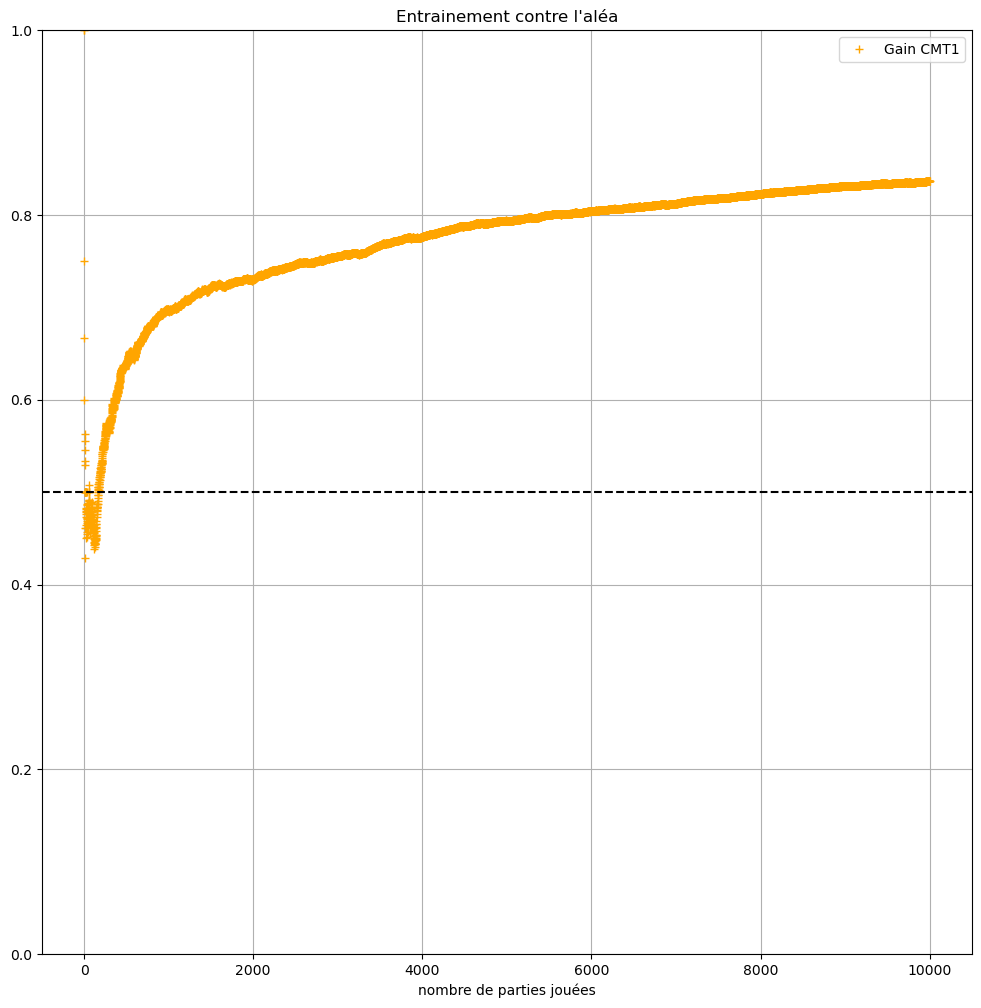

In [48]:
n = 100000

rec1 = [i == 1 for i in rec]
cum = np.cumsum(rec1)
freq = [cum[i]/(i+1) for i in range(len(cum))]
plt.figure(figsize=(12,12))

rg = list(range(1,n+1))

print("Après entrainement contre un environement jouant aléatoirement, l'ordinateur gagne \n --------------", freq[-1], "% du temps")

plt.plot(freq, marker='+',color='orange', linestyle=' ')
plt.legend(["Gain CMT1"])
plt.ylim(0, 1)
plt.axhline(y=0.5, color="black", linestyle="--")
plt.xlabel('nombre de parties jouées')
plt.ylabel('')
plt.title('Entrainement contre l\'aléa')
plt.grid(True)
plt.show()